* 공공데이터분석 기말고사 2024.06.14 (금)

In [1]:
##################################################
############### 문제 풀기 전 주의사항 ##############
##################################################

# 시험시간 내 인터넷 사용 금지, 시험문제 다운로드, 업로드 시에만 가능
# (시험 중, 핸드폰이나 인터넷 사용을 포함한 부정행위 적발시 0점 처리).

# ipynb 시험파일, html 시험파일, 데이터를 다운 받고,
# ipynb 시험 파일은 파일명 수정 -> da금_기말_20181234_홍길동.ipynb.

# html 파일의 실행결과를 참고하여, ipynb 파일의 #=== 코드작성 ===# 부분에 코드를 작성
# (ipynb파일의 실행결과는 코드 작성과정에서 사라질 수 있음).

# 맨 위의 셀을 우선 실행.
# 랜덤 값을 입력으로하는 문제는 주어진 실행결과와 다른 실행결과가 나올 수 있음.
# 문제에 주어진 코드는 수정 불가.

# 코드는 다른 값을 갖는 데이터에서도 동작을 해야만 정답으로 인정
# (문제의 데이터 값 자체를 가지고 결과를 만들면 오답 처리)

# 시험 도중 anaconda prompt (검은창) 지우지 말것.
# 갑자기 컴퓨터에 문제가 생길수 있으니, 시험 중간중간에 파일 저장 (crtl+s) 할 것.

# 시험이 끝나면 실행결과를 모두 확인하고 작성한 ipynb 파일 저장 후,
# 작성한 ipynb을 < 캔버스 --> 과제 --> 기말고사> 에 업로드.


In [3]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic") # window

import seaborn as sns
print('seaborn', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# # 경고 메시지는 출력되지 않게 합니다.
# import warnings
# warnings.filterwarnings("ignore")

python 3.10.17 (main, Apr  8 2025, 12:10:59) [Clang 17.0.0 (clang-1700.0.13.3)]
numpy 1.26.4
pandas 2.2.3
matplotlib 3.10.0
seaborn 0.13.2


# dat1 load (문제1-3 사용)
* dat1: 서울, 부산 상권정보데이터

In [4]:
dat1=pd.read_csv('data/dat1_상권정보.csv', sep=',')
dat1.head(3)

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,MA0106202307A0467187,츠키요와,음식,일식,일식 회/초밥,일식 음식점업,서울특별시,강남구,청담동,청담동,대지,83.0,서울특별시 강남구 청담동 83-17,서울특별시 강남구 선릉로158길,13.0,서울특별시 강남구 선릉로158길 13-12,127.041457,37.526122
1,MA010120220804242022,하나오토,수리·개인,자동차 수리·세차,자동차 정비소,자동차 전문 수리업,서울특별시,광진구,자양2동,자양동,대지,607.0,서울특별시 광진구 자양동 607-13,서울특별시 광진구 뚝섬로,612.0,서울특별시 광진구 뚝섬로 612-1,127.077686,37.532375
2,MA010120220813745897,호리존잠원스튜디오,시설관리·임대,산업용품 대여,기타 산업용 기계/장비 대여업,기타 산업용 기계 및 장비 임대업,서울특별시,서초구,잠원동,잠원동,대지,45.0,서울특별시 서초구 잠원동 45-21,서울특별시 서초구 신반포로43길,11.0,서울특별시 서초구 신반포로43길 11-40,127.016841,37.510449


# 문제1
* dat1을 copy한 df1가 주어져 있다. 부산광역시의 각 시군구에 있는 상점의 개수를 bargraph로 나타내시오
* 조건1) seaborn 함수를 사용하시오
* 조건2) 상점이 많이 있는 구 순서대로 나타내시오


<Axes: xlabel='count', ylabel='시군구명'>

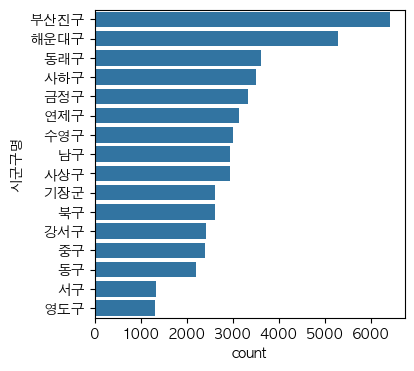

In [7]:
df1=dat1.copy()

fig=plt.figure(figsize=(4,4),dpi=100)
ax1=fig.subplots()

## 코드작성
sr1 = df1.loc[df1['시도명'] == '부산광역시', '시군구명'].value_counts()
sns.barplot(sr1, ax=ax1, orient='h')
## 코드작성 끝

# 문제2
* dat1을 copy한 df2가 주어져 있다. df2에서 결측치가 하나라도 있는 column을 제거한 df2_res을 생성하시오

In [11]:
df2=dat1.copy()

## 코드작성
sr2 = df2.isnull().sum(axis=0)
sr2 = sr2[sr2 > 0]
df2_res = df2[sr2.index]
## 코드작성 끝

df2.shape
df2_res.shape
df2_res.columns

(207510, 18)

(207510, 2)

Index(['표준산업분류명', '건물본번지'], dtype='object')

# 문제3
* dat1을 copy한 df3가 주어져 있다. 각 시도별로 각 대분류에 속한 상점 수를 다중 bar그래프로 나타내시오
* 조건1) pandas plot으로 나타내시오
* (대분류명의 순서 및 legend 위치는 채점과 무관)

<Axes: xlabel='시도명'>

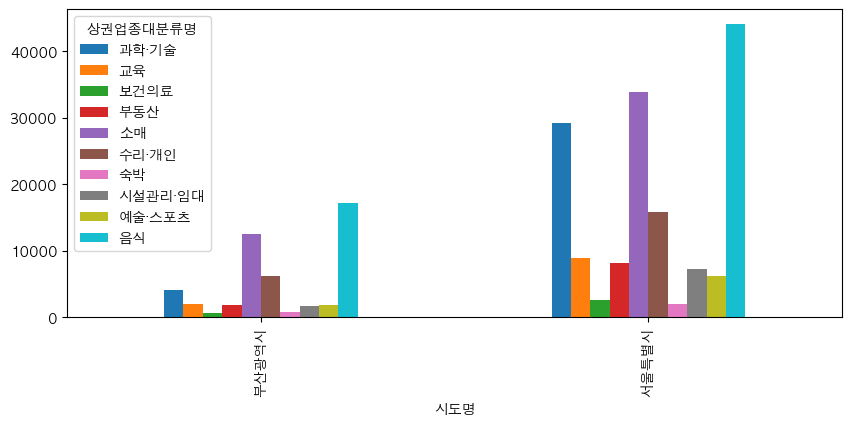

In [81]:
df3=dat1.copy()

fig=plt.figure(figsize=(10,4),dpi=100)
ax1=fig.subplots()

## 코드작성
df3.groupby('시도명')['상권업종대분류명'].value_counts().unstack(1).plot.bar(ax=ax1)
## 코드작성 끝

# dat2 load (문제4-6 사용)
* 행: 각 농장
* 열: 각 농장 번호, 농장 속한 지역, 농장이 재배하는 상품
* (문제를 위해 만든 가상데이터임)

In [15]:
dat2=pd.read_csv('data/dat2_농장.csv', sep=',', encoding='cp949')
dat2.head(3)

,농장번호,지역,상품
0,1,대구,사과
1,2,대구,인삼
2,3,대구,단감


# 문제4
* dat2을 copy한 df4가 주어져 있다. 상품 이름에 '과' 또는 '감'이 들어간 행만 추출한 df4_res를 구하시오

In [16]:
df4=dat2.copy()

## 코드작성
df4_res = df4[df4['상품'].str.contains('과|감')]
## 코드작성 끝
df4_res
df4_res.shape

,농장번호,지역,상품
0,1,대구,사과
2,3,대구,단감
3,4,대구,사과
4,5,대구,사과
13,14,대구,사과
14,15,대구,사과
16,17,강릉,단감
23,24,대구,사과
25,26,대구,사과
26,27,강릉,단감


(15, 3)

# 문제5
* dat2을 copy한 df5가 주어져 있다. 아래 두 가지를 구하시오
* 1) 각 지역별로 재배하는 상품 품목수를 담은 series sr5_res1
* 2) 그 상품리스트를 담은 series sr5_res2


In [21]:
df5=dat2.copy()

## 코드작성
sr5_res1 = df5.groupby('지역')['상품'].nunique()
sr5_res2 = df5.groupby('지역')['상품'].unique()
## 코드작성 끝

sr5_res1
sr5_res2

지역
강릉    4
대구    4
제주    3
Name: 상품, dtype: int64

지역
강릉     [복숭아, 단감, 배, 귤]
대구    [사과, 인삼, 단감, 포도]
제주         [수박, 귤, 인삼]
Name: 상품, dtype: object

# 문제6
* dat2을 copy한 df6가 주어져 있다. 상품을 재배하는 농장 수를 봤을 때, 각 지역별로 가장 많이 재배하는 Top2 상품의 농장 수를 시각화 하시오
* 조건1) axes plot으로 나타내시오

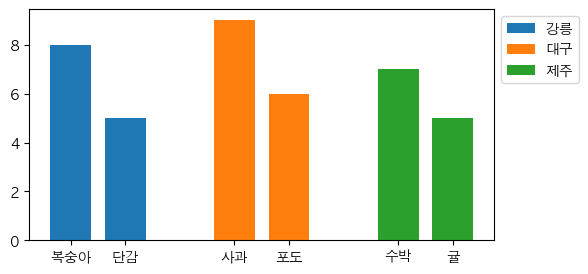

In [38]:
df6=dat2.copy()

fig=plt.figure(figsize=(6,3),dpi=100)
ax1=fig.subplots()

all_xticks=[]
all_xtick_labels=[]

## 코드작성
df6_res = df6.groupby('지역')['상품'].value_counts().unstack(1)

for i, idx in enumerate(df6_res.index):
    row = df6_res.loc[idx]
    sr6 = row.sort_values(ascending=False).head(2)
    x1, x2 = i, i+(1/len(df6_res))
    _= ax1.bar([x1, x2], sr6, width=1/(len(df6_res)+1), label=row.name)
    all_xticks.extend([x1, x2])
    all_xtick_labels.extend(sr6.index)
## 코드작성 끝

_=ax1.set_xticks(all_xticks, all_xtick_labels)
_=ax1.legend(bbox_to_anchor=(1,1), loc='upper left')

# dat3 load (문제7-9, 11-13 사용)
* 전국도시공원표준데이터

In [39]:
dat3 = pd.read_csv("data/dat3_전국도시공원표준데이터.csv", encoding="cp949")
dat3=dat3.loc[dat3['소재지지번주소'].notnull()].copy()
dat3['시도']=dat3["소재지지번주소"].map(lambda x: x.split(' ')[0])
dat3=dat3[['공원명','공원구분','시도','위도','경도','공원보유시설(편익시설)','공원면적']]
dat3.head(2)

,공원명,공원구분,시도,위도,경도,공원보유시설(편익시설),공원면적
0,구랑공원,문화공원,부산광역시,35.157215,128.854935,화장실,9137.0
1,압곡공원,근린공원,부산광역시,35.154655,128.854727,NaN,33756.0


# 문제7
* dat3을 전처리한 df7이 주어져 있다. 각 시도 별로 "가장" 많이 있는 공원구분과 그 개수를 dataframe df7_res에 담으시오

In [43]:
df7=dat3.loc[dat3['시도'].isin(['부산광역시','전라남도','서울특별시','강원도'])].copy()


## 코드작성
df7_res = df7.groupby('시도')['공원구분'].value_counts().reset_index().drop_duplicates(subset=['시도'])
## 코드작성 끝

df7_res

,시도,공원구분,count
0,강원도,어린이공원,390
9,부산광역시,어린이공원,363
19,서울특별시,어린이공원,1090
29,전라남도,소공원,625


# 문제8
* dat3을 전처리한 df8이 주어져 있다. 각 시도 별로 "두번째"로 많이 있는 공원구분과 그 개수를 dataframe df8_res에 담으시오
* 조건1) df8_res를 공원의 수로 sorting하시오

In [57]:
df8=dat3.loc[dat3['시도'].isin(['충청남도','전라남도','서울특별시','강원도'])].copy()

## 코드작성
df8_res = df8.groupby('시도')['공원구분'].apply(lambda x : x.value_counts().iloc[1:2]).reset_index()
df8_res.columns = ['시도', '공원구분', '개수']
df8_res.sort_values(by='개수', ascending=False, inplace=True)
## 코드작성 끝

df8_res

,시도,공원구분,개수
2,전라남도,어린이공원,526
3,충청남도,근린공원,422
1,서울특별시,근린공원,324
0,강원도,근린공원,141


# 문제9
* dat3을 전처리한 df9가 주어져 있다. 각 시도 별, 공원별 count를 아래와 같이 다중 bar그래프로 나타내시오
* 조건1) seaborn을 사용하시오
* 조건2) 주어진 sido_list순서대로 bar그래프의 x축 순서를 정하여 나타내시오
* 조건3) 주어진 park_list 순서대로 bar그래프의 hue의 순서를 정하여 나타내시오

,시도,공원구분,count
0,강원도,어린이공원,390
1,강원도,근린공원,141
2,강원도,소공원,85
3,서울특별시,어린이공원,1090
4,서울특별시,근린공원,324
5,서울특별시,소공원,175
6,전라남도,소공원,625
7,전라남도,어린이공원,526
8,전라남도,근린공원,322
9,충청남도,어린이공원,746


<Axes: xlabel='시도', ylabel='count'>

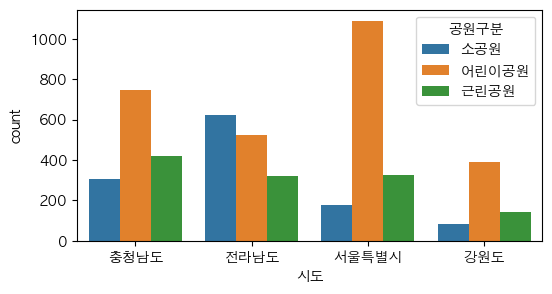

In [64]:
sido_list=['충청남도','전라남도','서울특별시','강원도']
park_list=['소공원','어린이공원','근린공원']

df9=dat3.loc[(dat3['시도'].isin(sido_list))&(dat3['공원구분'].isin(park_list))].copy()

fig=plt.figure(figsize=(6,3),dpi=100)
ax1=fig.subplots()

## 코드작성
df9_res = df9.groupby('시도')['공원구분'].value_counts().reset_index()
df9_res
sns.barplot(df9_res,x='시도',y='count',hue='공원구분',ax=ax1,order=sido_list, hue_order=park_list)
## 코드작성 끝

# 문제10
* 주어진 df10은 태어난 아이의 성별(gender)과 생년(year) 정보이다
* 성별로 (남자:'M', 여자:'F'), 2000년이상 2005년이하에 태어난 아이수를 누적그래프로 그리시오
* 조건1) pandas plot으로 그리시오

,gender&year
0,F&2009
1,F&1998
2,F&1992


gender,F,M
year,,
2000,11,19
2001,10,11
2002,10,15
2003,5,17
2004,11,13
2005,5,15


<Axes: xlabel='year'>

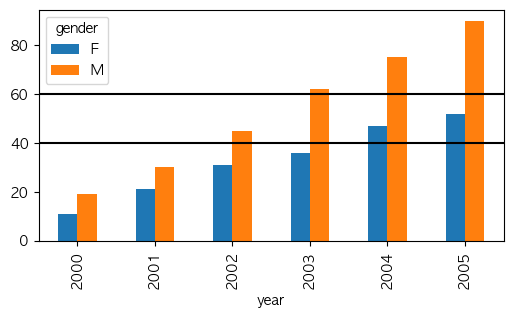

In [80]:
df10=pd.read_table('data/dat4_gender_year.csv')
df10.head(3)

fig=plt.figure(figsize=(6,3),dpi=100)
ax1=fig.subplots()

## 코드작성
df10['year'] = df10['gender&year'].str.split('&').str[1].map(int)
df10['gender'] = df10['gender&year'].str.split('&').str[0]
df10_res = df10[(df10['year'] >= 2000) & (df10['year'] <= 2005)]
df10_res = df10_res.groupby('gender')['year'].value_counts().unstack(0)
df10_res
df10_res.cumsum(axis=0).plot.bar(ax=ax1)
## 코드작성 끝

_=ax1.axhline(y=60, color='k')
_=ax1.axhline(y=40, color='k')

# 문제11
* 전처리된 df_station, df_park 데이터를 사용하여
* 주어진 두 역 (station1, station2)에서 가장 가까운 공원의 아래와 같은 정보를 찾는 코드이다
* (가장 가까운 공원은 두 역에서의 거리의 합이 가장 작은 공원을 말한다)
* 코드를 완성하시오
* ..
* == 출력 정보: park (공원명), p_lat (공원 위도), p_long (공원 경도), dist1 (station1 에서의 거리), dist2 (station2 에서의 거리), distsum (두 역에서의 거리 합)
* ..
* 힌트) apply & 함수정의, 함수는 각 역 별로 총 두 개 정의 가능 (사용하지 않아도 무방)

In [84]:
#%pip install haversine
from haversine import haversine
import folium

In [95]:
station1='시청'
station2='충무로'

df_station = pd.read_csv("data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20231031.csv", encoding="cp949")
df_park=dat3.loc[dat3['시도']=='서울특별시',['공원명','위도','경도']]
df_station
df_park

###### 코드작성
s1_lat, s1_long = df_station.loc[df_station['역명']==station1, ['위도', '경도']].iloc[0]
s2_lat, s2_long = df_station.loc[df_station['역명']==station2, ['위도', '경도']].iloc[0]

def get_dist(row):
    lat, long = row['위도'], row['경도']
    return haversine((s1_lat, s1_long), (lat, long)) + haversine((s2_lat, s2_long), (lat, long))

df_park['거리'] = df_park.apply(get_dist, axis=1)
df_park.sort_values(by='거리', ascending=True, inplace=True)
park, p_lat, p_long, dist = df_park.iloc[0]

###### 코드작성 끝

## map 생성
m = folium.Map([(s1_lat+s2_lat)/2, (s1_long+s2_long)/2], zoom_start=15)

## 지하철역 marekr 추가
_=folium.Marker([s1_lat, s1_long], tooltip='역1:'+station1, icon=folium.Icon(color="green")).add_to(m)
_=folium.Marker([s2_lat, s2_long], tooltip='역2:'+station2, icon=folium.Icon(color="green")).add_to(m)
## 공원 marekr 추가
_=folium.Marker([p_lat, p_long], tooltip='공원:'+park, icon=folium.Icon(color="red")).add_to(m)

## 공원과 지하철 연결하는 선 추가
_=folium.PolyLine(locations=[[s1_lat, s1_long],[p_lat, p_long]], weight=10).add_to(m)
_=folium.PolyLine(locations=[[s2_lat, s2_long],[p_lat, p_long]], weight=10).add_to(m)

## map 확인
m

,연번,호선,고유역번호(외부역코드),역명,위도,경도,작성일자
0,1,1,150,서울,37.553150,126.972533,1974-02-28
1,2,1,151,시청,37.563590,126.975407,1974-08-15
2,3,1,152,종각,37.570203,126.983116,1974-08-15
3,4,1,153,종로3가,37.570429,126.992095,1974-08-15
4,5,1,154,종로5가,37.570971,127.001900,1974-03-31
...,...,...,...,...,...,...,...
271,272,8,2823,남한산성입구,37.451568,127.159845,1996-10-31
272,273,8,2824,단대오거리,37.445057,127.156735,1996-12-28
273,274,8,2825,신흥,37.440952,127.147590,1996-12-28
274,275,8,2826,수진,37.437575,127.140936,1996-12-28


,공원명,위도,경도
213,가락,37.498469,127.125124
214,개나리,37.507553,127.094089
215,개롱,37.493407,127.130026
216,거여,37.497007,127.140981
217,건너말,37.491603,127.123473
...,...,...,...
18033,꽃담길,37.505644,126.942102
18034,흑석,37.509385,126.957863
18035,꿈나래,37.505268,126.948180
18036,새빛,37.487382,126.974669


# 문제12

## 힌트 (사용하지 않아도 무관)

In [18]:
b1=pd.Series([True, False, True, True])
b1 # boolean series
~b1 #b1의 반대

0     True
1    False
2     True
3     True
dtype: bool

0    False
1     True
2    False
3    False
dtype: bool

## 문제12
* 아래는 dat3을 처리한 df12로부터, 화장실이 있는 공원과 없는 공원을 marker cluster로 나타내는 코드이다. 코드를 완성하시오
* 조건) 지도를 확대하여 아이콘 확인시, 아이콘 색깔은 화장실이 있는경우 '파란색' 없는경우는 '빨간색'으로 하시오

In [98]:
df_toilet

,공원명,공원구분,시도,위도,경도,공원보유시설(편익시설),공원면적
6107,늘푸른어린이공원,어린이공원,서울특별시,37.534791,126.956646,화장실,2300.0
9390,한울,근린공원,서울특별시,37.519698,126.832681,"화장실, 경로당",15465.4
14259,서오릉도시자연공원&lt;시공원&gt;,기타,서울특별시,37.637976,126.913577,"주차장1, 화장실1",1082847.0


In [99]:
import folium
from folium.plugins import MarkerCluster

df12=dat3.loc[dat3['시도']=='서울특별시'].iloc[::40].copy()
lat_m=df12['위도'].mean()
long_m=df12['경도'].mean()

m = folium.Map([lat_m, long_m], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

## 코드작성
with_toilet = df12['공원보유시설(편익시설)'].str.contains('화장실', na=False)
df_toilet = df12[with_toilet]
df_not_toilet = df12[~with_toilet]

for i in df_toilet.index:
    lat, long, name = df_toilet.loc[i, ['위도', '경도', '공원명']]
    _=folium.Marker([lat, long], tooltip=name,icon=folium.Icon(color='blue')).add_to(marker_cluster)
    
for i in df_not_toilet.index:
    lat, long, name = df_not_toilet.loc[i, ['위도', '경도', '공원명']]
    _=folium.Marker([lat, long], tooltip=name,icon=folium.Icon(color='red')).add_to(marker_cluster)
## 코드작성 끝

m

# 문제13
* 전처리된 df13을 사용하여 countplot을 수행한 결과이다.
* 이 bar그래프 위에 각 bar의 height를 text로 넣으시오
* (bar의 width는 0.27이다)

시도,경기도,대전광역시,전라남도
공원구분,,,
소공원,406,47,625
어린이공원,1821,315,526


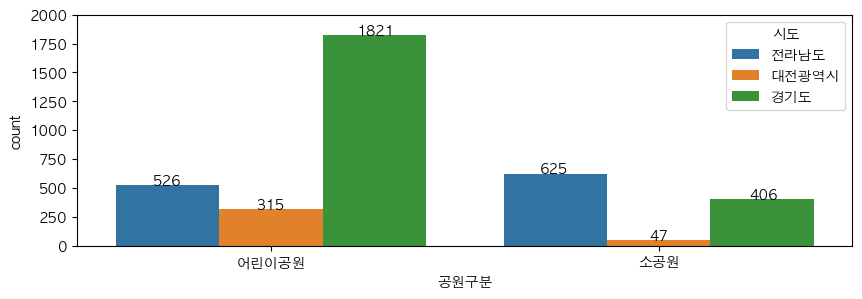

In [116]:
df13=dat3.loc[(dat3['시도'].isin(['경기도','전라남도','대전광역시']))&(dat3['공원구분'].isin(['소공원','어린이공원']))].copy()

fig=plt.figure(figsize=(10,3),dpi=100)
ax1=fig.subplots()

_=sns.countplot(data=df13, x='공원구분',hue='시도', ax=ax1)

## 코드작성
df13_res = df13.groupby(['시도'])['공원구분'].value_counts().unstack(0)
df13_res

for text in ax1.get_xticklabels():
    x = text.get_position()[0]
    c1, c2, c3 = df13_res.loc[text.get_text(), ['전라남도', '대전광역시', '경기도']]
    _=ax1.text(x-0.27, c1, c1,ha='center')
    _=ax1.text(x, c2, c2,ha='center')
    _=ax1.text(x+0.27, c3, c3,ha='center')
## 코드작성 끝

_=ax1.set_ylim(0,2000)